Sentiment Analysis: the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral. 

Problem Statement :Using Sentiment Analysis, evaluate customer reviews from an e-commerce platform to assess product satisfaction and try to answer the following questions:

   - What are the most common positive and negative sentiments expressed in customer reviews?

   - Are there any patterns or trends in sentiment related to specific product features or attributes?

   - Can sentiment analysis help identify areas for product improvement based on customer feedback?

Data Used - I have used the data from flipkart which was taken from Kaggle.

This has 2304 rows and 4 columns of which we may consider only three columns for our analysis. But before proceeding further I will import the required libraries

In [1]:
### Importing and Installing required Libraries

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import nltk
from nltk.corpus import stopwords
!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
!pip install textblob 
import textblob
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhanuds\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bhanuds\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
### Importing the data (actually downloaded from Kaggle)


df=pd.read_csv("flipkart.csv")

In [4]:
df.head(15)

,Unnamed: 0,Product_name,Review,Rating
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5
5,5,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Amazing laptop, am so much happy, thanks for F...",5
6,6,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,Over all a good laptop for personal use,5
7,7,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,Thank you so much Flipkart,4
8,8,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,Amazing product,5
9,9,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Good for normal work , students, online classe...",3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2304 non-null   int64 
 1   Product_name  2304 non-null   object
 2   Review        2304 non-null   object
 3   Rating        2304 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 72.1+ KB


In [6]:
## So, here we see that we have no null values

df.isnull().sum()

Unnamed: 0      0
Product_name    0
Review          0
Rating          0
dtype: int64

In [7]:
### Selecting only three columns (not considering Unnamed column for our use)
df=df[['Product_name','Review', 'Rating']]
df

,Product_name,Review,Rating
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5
...,...,...,...
2299,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,"Great display, accurate colours at this price ...",5
2300,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Superb monitor first brought 1 used for 2 mont...,5
2301,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Awesome,5
2302,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Only one issue with adapter,5


In [8]:
df.head(25)

,Product_name,Review,Rating
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5
5,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Amazing laptop, am so much happy, thanks for F...",5
6,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,Over all a good laptop for personal use,5
7,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,Thank you so much Flipkart,4
8,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,Amazing product,5
9,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Good for normal work , students, online classe...",3


In [9]:
####### Data Cleaning Steps
### We see that the review column has many unwanted strings like https, emojis, @, #, $ etc which we should remove

import re
from textblob import TextBlob
def cleanReviews(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('https?:\/\/\S+', '', text)  #removes https
    text = re.sub('\n',' ',text) #removes new lin
    text = re.sub(r'www\S+', " ", text) #removes www
    text = re.sub(r'\.|/|:|-', " ", text)
    text = re.sub(r'[^\w\s]','',text)
    return text
df['cleanedReviews'] = df['Review'].apply(cleanReviews)

In [10]:
### Similarly the Product_name column also has some values $, --- etc which is of no use and we need to remove it before futher steps
def cleanProduct_name(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) ###removes hastag '#' symbol
    text = re.sub('$','',text) ###removes hastag '$' symbol
    text = re.sub('https?:\/\/\S+', '', text)  #removes https
    text = re.sub('\n',' ',text) #removes new lin
    text = re.sub(r'www\S+', " ", text) #removes www
    text = re.sub(r'\.|/|:|-', " ", text)
    text = re.sub(r'[^\w\s]','',text)
    return text
df['cleanedProduct_name'] = df['Product_name'].apply(cleanProduct_name)

In [11]:
df

,Product_name,Review,Rating,cleanedReviews,cleanedProduct_name
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5,Best under 60k Great performanceI got it for a...,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5,Good perfomence,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5,Great performance but usually it has also that...,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5,My wife is so happy and best product,DELL Inspiron Athlon Dual Core 3050U 4 GB 25...
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5,Light weight laptop with new amazing features ...,DELL Inspiron Athlon Dual Core 3050U 4 GB 25...
...,...,...,...,...,...
2299,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,"Great display, accurate colours at this price ...",5,Great display accurate colours at this price r...,MSI 27 inch Full HD IPS Panel Monitor PRO MP27...
2300,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Superb monitor first brought 1 used for 2 mont...,5,Superb monitor first brought 1 used for 2 mont...,MSI 27 inch Full HD IPS Panel Monitor PRO MP27...
2301,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Awesome,5,Awesome,MSI 27 inch Full HD IPS Panel Monitor PRO MP27...
2302,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Only one issue with adapter,5,Only one issue with adapter,MSI 27 inch Full HD IPS Panel Monitor PRO MP27...


In [12]:
### I am taking the subset of the data considering only the columns(cleaned) that I want to use 
df1=df[['cleanedProduct_name','cleanedReviews','Rating']]
df1

,cleanedProduct_name,cleanedReviews,Rating
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence,5
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,DELL Inspiron Athlon Dual Core 3050U 4 GB 25...,My wife is so happy and best product,5
4,DELL Inspiron Athlon Dual Core 3050U 4 GB 25...,Light weight laptop with new amazing features ...,5
...,...,...,...
2299,MSI 27 inch Full HD IPS Panel Monitor PRO MP27...,Great display accurate colours at this price r...,5
2300,MSI 27 inch Full HD IPS Panel Monitor PRO MP27...,Superb monitor first brought 1 used for 2 mont...,5
2301,MSI 27 inch Full HD IPS Panel Monitor PRO MP27...,Awesome,5
2302,MSI 27 inch Full HD IPS Panel Monitor PRO MP27...,Only one issue with adapter,5


<BarContainer object of 5 artists>

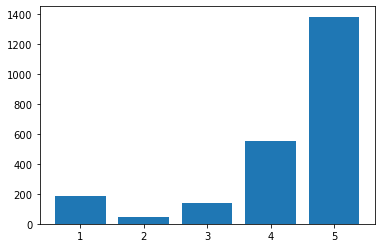

In [13]:
### Ploting the Ratings as a bargraph , we see there are many products that have 5 rating

x=[5,4,1,3,2]
plt.bar(x,df['Rating'].value_counts())

In [14]:
#### Let us see the percentage of these ratings

ratings = df1["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values


In [39]:
import plotly.express as px
figure = px.pie(df1, values=quantity, names=numbers,hole = 0.40)
figure.update_layout(width=800, height=600)
figure.show()

In [16]:
#### Hear am defining a function to establish rating scores as postives, negatives and neutral
def getAnalysis(rating):
    if rating<3:
        return 'Negative'
    elif rating ==3:
        return 'Neutral'
    else:
        return 'Positive'
    
df1['Analysis'] = df1['Rating'].apply(getAnalysis)

df1

C:\Users\bhanuds\AppData\Local\Temp\ipykernel_5364\958815121.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,cleanedProduct_name,cleanedReviews,Rating,Analysis
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5,Positive
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence,5,Positive
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5,Positive
3,DELL Inspiron Athlon Dual Core 3050U 4 GB 25...,My wife is so happy and best product,5,Positive
4,DELL Inspiron Athlon Dual Core 3050U 4 GB 25...,Light weight laptop with new amazing features ...,5,Positive
...,...,...,...,...
2299,MSI 27 inch Full HD IPS Panel Monitor PRO MP27...,Great display accurate colours at this price r...,5,Positive
2300,MSI 27 inch Full HD IPS Panel Monitor PRO MP27...,Superb monitor first brought 1 used for 2 mont...,5,Positive
2301,MSI 27 inch Full HD IPS Panel Monitor PRO MP27...,Awesome,5,Positive
2302,MSI 27 inch Full HD IPS Panel Monitor PRO MP27...,Only one issue with adapter,5,Positive


In [17]:
#### Finding Subjectivity and Polarity based on Cleaned Reviews

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#get polarity with a function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
df1['Subjectivity'] = df1['cleanedReviews'].apply(getSubjectivity)
df1['Polarity'] = df1['cleanedReviews'].apply(getPolarity)

In [18]:
### Establishing Positive, negative and neutral based on Polarity
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
df1['Analysis2'] = df1['Polarity'].apply(getAnalysis)

df1

,cleanedProduct_name,cleanedReviews,Rating,Analysis,Subjectivity,Polarity,Analysis2
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5,Positive,0.472424,0.438788,Positive
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence,5,Positive,0.600000,0.700000,Positive
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5,Positive,0.666667,0.183333,Positive
3,DELL Inspiron Athlon Dual Core 3050U 4 GB 25...,My wife is so happy and best product,5,Positive,0.650000,0.900000,Positive
4,DELL Inspiron Athlon Dual Core 3050U 4 GB 25...,Light weight laptop with new amazing features ...,5,Positive,0.763636,0.534091,Positive
...,...,...,...,...,...,...,...
2299,MSI 27 inch Full HD IPS Panel Monitor PRO MP27...,Great display accurate colours at this price r...,5,Positive,0.691667,0.600000,Positive
2300,MSI 27 inch Full HD IPS Panel Monitor PRO MP27...,Superb monitor first brought 1 used for 2 mont...,5,Positive,0.666667,0.625000,Positive
2301,MSI 27 inch Full HD IPS Panel Monitor PRO MP27...,Awesome,5,Positive,1.000000,1.000000,Positive
2302,MSI 27 inch Full HD IPS Panel Monitor PRO MP27...,Only one issue with adapter,5,Positive,1.000000,0.000000,Neutral


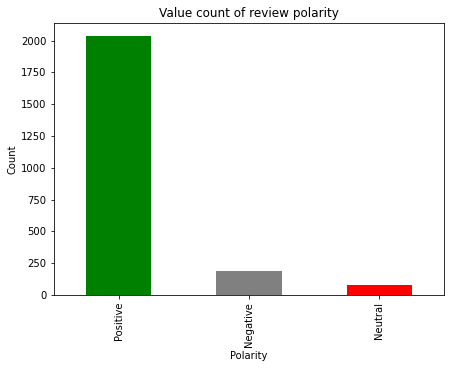

In [19]:
### Plotting Bar Charts based on Polarity
fig = plt.figure(figsize=(7,5))
color = ['green','grey','red']
df1['Analysis2'].value_counts().plot(kind='bar',color = color)
plt.title('Value count of review polarity')
plt.ylabel('Count')
plt.xlabel('Polarity')
plt.grid(False)
plt.show()

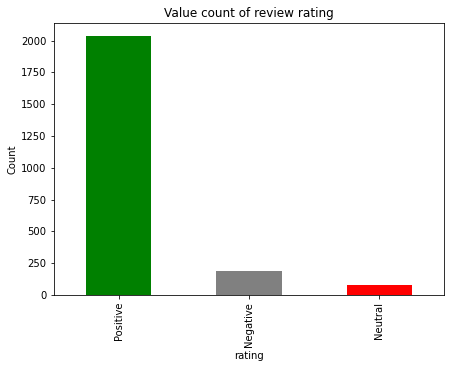

In [20]:
### Plotting Bar Charts based on Ratings
fig = plt.figure(figsize=(7,5))
color = ['green','grey','red']
df1['Analysis2'].value_counts().plot(kind='bar',color = color)
plt.title('Value count of review rating')
plt.ylabel('Count')
plt.xlabel('rating')
plt.grid(False)
plt.show()

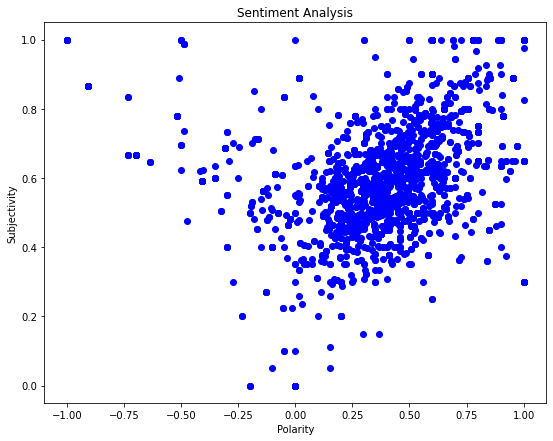

In [21]:
### Plotting Scatterplots based on Polarity & Subjectivity
plt.figure(figsize=(9,7))
for i in range(0,df1.shape[0]):
    plt.scatter(df1['Polarity'][i],df1['Subjectivity'][i], color='blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [22]:
### Getting the Negative Reviews based on Ratings
negReviews = df1.loc[df1['Analysis']=='Negative', 'cleanedReviews']

In [23]:
negReviews

13      If you can affort few thousands extra you can ...
39      Display so bad quality and wifi connectivity i...
65                                    Very bad experience
83      Speakers are completely not working well worst...
84                            Start Hanging within a week
                              ...                        
2196    Getting 2 Blurred patches on the right hand si...
2199                        HDMI CABLE  VERY POOR QUALITY
2212    Getting 2 Blurred patches on the right hand si...
2273    Getting 2 Blurred patches on the right hand si...
2297    The product from MSI is good  But the service ...
Name: cleanedReviews, Length: 230, dtype: object

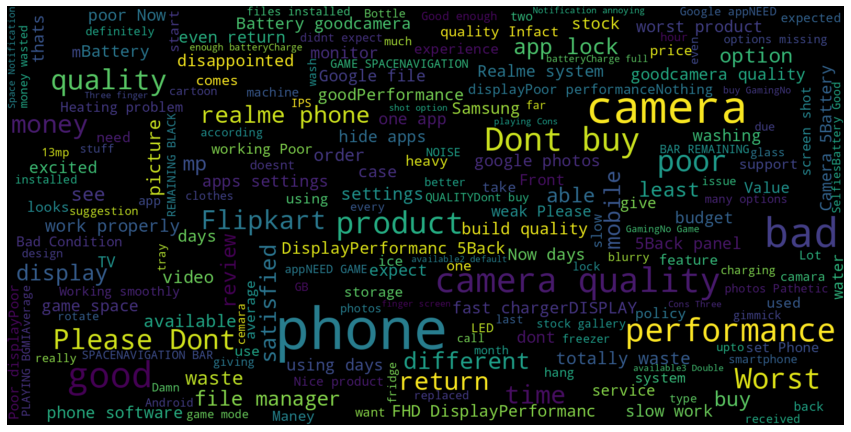

In [24]:
#### Creating a Word Cloud to understand the most used words in Negative Reviews or Common Negative Sentiments

consolidated=' '.join(word for word in df1['cleanedReviews'][df1['Analysis2']=='Negative'].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
### Getting the Positive Reviews based on Ratings

posReviews = df1.loc[df1['Analysis2']=='Positive', 'cleanedReviews']

In [26]:
posReviews

0       Best under 60k Great performanceI got it for a...
1                                      Good perfomence   
2       Great performance but usually it has also that...
3                   My wife is so happy and best product 
4       Light weight laptop with new amazing features ...
                              ...                        
2298    Cool and best in below 9000 prize range go for it
2299    Great display accurate colours at this price r...
2300    Superb monitor first brought 1 used for 2 mont...
2301                                              Awesome
2303    Worth the money u spend for this monitor Great...
Name: cleanedReviews, Length: 2035, dtype: object

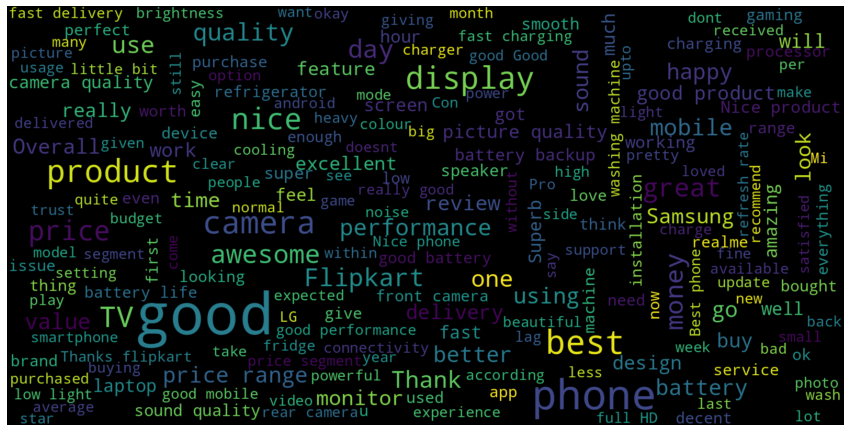

In [27]:
#### Creating a Word Cloud to understand the most used words in Positive Reviews or Common Positive Sentiments

consolidated=' '.join(word for word in df1['cleanedReviews'][df1['Analysis2']=='Positive'].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
## I wanted to see the top 20 Products based on the mean of Polarity 
Sentiplot = df1.groupby(['cleanedProduct_name'])['Polarity'].mean().nlargest(20)

In [29]:
Sentiplot

cleanedProduct_name
LG 24 inch Full HD LED Backlit IPS Panel Monitor 24MP400  Response Time  5 ms                                                                                  1.000000
DELL Inspiron Ryzen 3 Dual Core 3250U   8 GB 256 GB SSD Windows 11 Home INSPIRON 3515 Thin and Light Laptop  15 6 Inch Carbon Black 1 8 Kgs With MS Office     0.740000
SAMSUNG Galaxy A22 5G Mint 128 GB  6 GB RAM                                                                                                                    0.731506
Lenovo ThinkBook 13s Core i5 11th Gen   16 GB 512 GB SSD Windows 10 Home TB13s ITL Gen 2 Thin and Light Laptop  13 inch Mineral Grey 1 26 kg With MS Office    0.722222
DELL P Series 22 inch Full HD LED Backlit IPS Panel Monitor P2222H  Response Time  5 ms 60 Hz Refresh Rate                                                     0.710683
Godrej 6 2 kg Fully Automatic Top Load Grey  WT EON 620 AP GP GR                                                                            

<AxesSubplot:title={'center':'Polarity'}, xlabel='Product', ylabel='Mean Sentiment Score'>

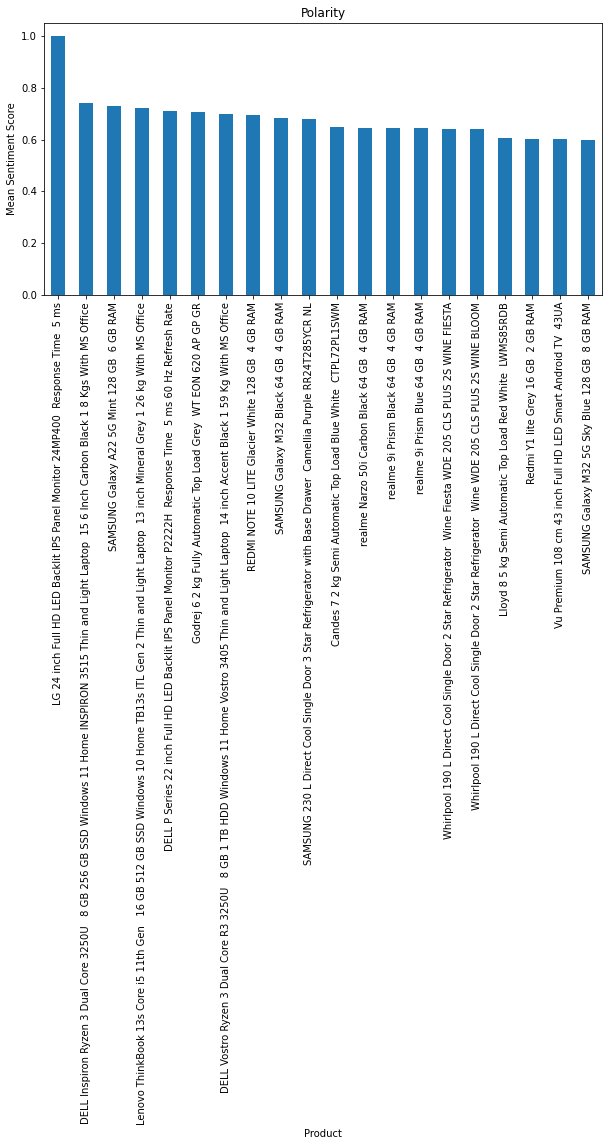

In [30]:
### The top 20 products based on the polarity mean
Sentiplot = df1.groupby(['cleanedProduct_name'])['Polarity'].mean().nlargest(20)
Sentiplot.plot(kind='bar', title='Polarity', ylabel='Mean Sentiment Score',
         xlabel='Product', figsize=(10, 5))

In [31]:
#### Top 25 words and their weightage in different reviews

nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
data_without_stopwords = []
for i in range(0, len(df1['cleanedReviews'])):
    doc = re.sub('[^a-zA-Z]', ' ',df1['cleanedReviews'][i])
    doc = doc.lower()
    doc = doc.split()
    doc = [lemmatizer.lemmatize(word) for word in doc if not word in set(stopwords.words("english"))]
    doc = ' '.join(doc)
    data_without_stopwords.append(doc)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\bhanuds\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer() 
vectors = vectorizer.fit_transform(data_without_stopwords)
tf_idf = pd.DataFrame(vectors.todense()).iloc[:5]  
tf_idf.columns = vectorizer.get_feature_names()
tfidf_matrix = tf_idf.T
tfidf_matrix.columns = ['Review'+ str(i) for i in range(1, 6)]
tfidf_matrix['count'] = tfidf_matrix.sum(axis=1)

# Top 25 words 
tfidf_matrix = tfidf_matrix.sort_values(by ='count', ascending=False)[:25] 

# Print the first 25 words 
print(tfidf_matrix.drop(columns=['count']).head(25))

                       Review1   Review2   Review3   Review4   Review5
perfomence            0.000000  0.979506  0.000000  0.000000  0.000000
wife                  0.000000  0.000000  0.000000  0.818064  0.000000
laptop                0.000000  0.000000  0.203482  0.000000  0.360581
battery               0.091111  0.000000  0.122360  0.000000  0.216828
new                   0.000000  0.000000  0.000000  0.000000  0.418518
software              0.175861  0.000000  0.236177  0.000000  0.000000
happy                 0.000000  0.000000  0.000000  0.402427  0.000000
best                  0.093095  0.000000  0.000000  0.307076  0.000000
weight                0.000000  0.000000  0.000000  0.000000  0.390851
adaptor               0.000000  0.000000  0.364451  0.000000  0.000000
life                  0.000000  0.000000  0.000000  0.000000  0.353983
usually               0.000000  0.000000  0.333069  0.000000  0.000000
light                 0.000000  0.000000  0.000000  0.000000  0.330376
adapte

C:\Users\bhanuds\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

